In [ ]:
#%pip install datasets
#%pip install huggingface_hub
#%pip install nltk
#%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip


In [3]:
%pip install --upgrade --force-reinstall scipy seaborn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -------------------------------------- 167.0/167.0 kB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.8 MB 16.5 MB/s eta 0:00:03
   - -------------------------------------- 1.1/44.8 MB 14.4 MB/s eta 0:00:04
   - -------------------------------------- 2.0/44.8 MB 16.3 MB/s eta 0:00:03
   -- ------------------------------------- 3.3/44.8 MB 17.5 MB/s eta 0:00:03
   --- ------------------------------------ 4.0/44.8 MB 17.2 MB/s eta 0:00:03
   --

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.1.3 which is incompatible.
streamlit 1.27.1 requires numpy<2,>=1.19.3, but you have numpy 2.1.3 which is incompatible.
streamlit 1.27.1 requires packaging<24,>=16.8, but you have packaging 24.2 which is incompatible.
streamlit 1.27.1 requires pillow<11,>=7.1.0, but you have pillow 11.0.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datasets import Dataset
from huggingface_hub import login
login()

In [2]:
import pandas as pd

splits = {'train': 'training set.csv', 'test': 'testing set.csv'}
df = pd.read_csv("hf://datasets/thefrankhsu/hate_speech_twitter/" + splits["train"])

In [3]:
df['categories'] = df['categories'].fillna("Normal")

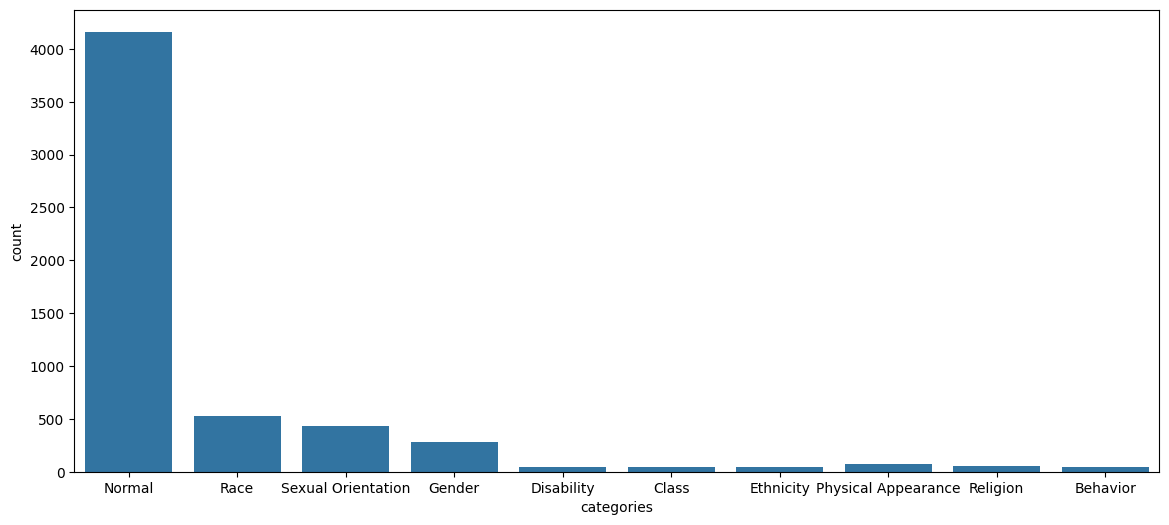

In [4]:
plt.figure(figsize=(14,6))
sns.countplot(x=df['categories'], data= df)
plt.show()

In [31]:
df['categories'].value_counts()

categories
Normal                 4163
Race                    523
Sexual Orientation      429
Gender                  279
Physical Appearance      73
Religion                 52
Disability               40
Class                    40
Ethnicity                40
Behavior                 40
Name: count, dtype: int64

In [55]:
df['categories'] = df['categories'].replace({'Normal':0, 'Race':1, 'Sexual Orientation':2, 'Gender':3, 'Physical Appearance':4, 'Religion':5, 'Disability':6, 'Class':7, 'Ethnicity':8, 'Behavior':9})

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_3208\3125606736.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['categories'] = df['categories'].replace({'Normal':0, 'Race':1, 'Sexual Orientation':2, 'Gender':3, 'Physical Appearance':4, 'Religion':5, 'Disability':6, 'Class':7, 'Ethnicity':8, 'Behavior':9})


{'Normal':0, 'Race':1, 
'Sexual Orientation':2, 
'Gender':3, 
'Physical Appearance':4, 
'Religion':5, 
'Disability':6, 
'Class':7, 
'Ethnicity':8, 
'Behavior':9}

# Text Cleaning

Handle Diacritics using Text normalization

In [4]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [5]:
df['Tweet'] = df['tweet'].astype('str').apply(simplify)

In [6]:
df[df['Tweet'].str.contains('@', na=False)]

tweet  label categories  \
308  @user @user you don't have the balls to hashta...      1   Behavior   

                                                 Tweet  
308  @user @user you don't have the balls to hashta...

In [7]:
df['Tweet'] = df['Tweet'].replace(r'@\w+','',regex=True)

In [60]:
pd.set_option('display.max_rows', 100)  # Set the maximum number of rows to display
pd.set_option('display.max_colwidth', None) 

In [8]:
df

tweet  label  \
0     krazy i dont always get drunk and pass out but...      0   
1     white kids favorite activities calling people ...      1   
2     maam did you clear that tweet with the   caref...      0   
3     wth is that playing missy  i mean seriously rt...      0   
4              he promised to stand with the muzzies so      0   
...                                                 ...    ...   
5674  big  been trash for years now lol its a basket...      0   
5675                            to was a faggot crybaby      1   
5676                     he wasnt training gook boy doe      0   
5677  us ghettosdriven by liberal ideology forged by...      1   
5678           want to go get this brownie im stuck doe      0   

              categories                                              Tweet  
0                 Normal  krazy i dont always get drunk and pass out but...  
1                   Race  white kids favorite activities calling people ...  
2                 Normal  maam did you clear that tweet with the   caref...  
3                 Normal  wth is that playing missy  i mean seriously rt...  
4                 Normal           he promised to stand with the muzzies so  
...                  ...                                                ...  
5674              Normal  big  been trash for years now lol its a basket...  
5675  Sexual Orientation                            to was a faggot crybaby  
5676              Normal                     he wasnt training gook boy doe  
5677                Race  us ghettosdriven by liberal ideology forged by...  
5678              Normal           want to go get this brownie im stuck doe  

[5679 rows x 4 columns]

In [9]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=True)
df['Tokenized_tweet'] = df['Tweet'].apply(tokenizer.tokenize)

Remove stopwords

In [10]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
remove_words = list(set(stop_words)-set(['no','never']))
def remove_stopwords(text):

    clean_text = [word for word in text if not word in remove_words]
    return clean_text   

In [11]:
df['Clean_tweets'] = df['Tokenized_tweet'].apply(remove_stopwords)

In [12]:
df['Clean_tweets'] = df['Clean_tweets'].str.join(' ')

Lemmatize

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: for additional language support
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
from nltk.tag import pos_tag
def get_wordnet_pos(treebank_tag):
    """Convert treebank POS tags to WordNet POS tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if POS is unknown

def lemmatize_sentence(sentence):
    # Tokenize the sentence
    words = nltk.word_tokenize(sentence)
    # Get POS tags for each word
    pos_tags = pos_tag(words)
    # Lemmatize each word with the correct POS tag
    lemmatized_sentence = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_sentence)

In [15]:
df['Lemmatized_Tweets'] = df['Clean_tweets'].apply(lemmatize_sentence)

In [19]:
pd.set_option('display.max_rows', 100)  # Set the maximum number of rows to display
pd.set_option('display.max_colwidth', None) 

In [16]:
df['Lemmatized_Tweets']

0       krazy dont always get drunk pas start making c...
1       white kid favorite activity call people nigger...
2       maam clear tweet careful may brand race traito...
3       wth play missy mean seriously rt republicann m...
4                                   promise stand muzzies
                              ...                        
5674             big trash year lol basketball conference
5675                                       faggot crybaby
5676                          wasnt training gook boy doe
5677    u ghettosdriven liberal ideology forge union a...
5678                     want go get brownie im stick doe
Name: Lemmatized_Tweets, Length: 5679, dtype: object

Spelling Corrections

In [ ]:
'''from textblob import TextBlob

def spell_check(text):
   
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return str(corrected_text)
df['Cleaner_Tweet'] = df['Lemmatized_Tweets'].astype('str').apply(lambda x: spell_check(x))
df = pd.read_csv('processed_tweets.csv')'''

In [41]:
df[df['categories']=='Religion']

tweet  label categories  \
101   shame of you selfhating kike we jews are gds c...      1   Religion   
111                           sit down and stfu raghead      1   Religion   
229   niggas always wanna talk about how god is agai...      1   Religion   
540   lovesbiebs go pray in a church or something fa...      1   Religion   
638   boringamphack allah and mohamed are also again...      1   Religion   
865   jus wanted to let yll know hope the hurricane ...      1   Religion   
1064                          king pats owner is a kike      1   Religion   
1154  no one goes into psychiatry to help people tho...      1   Religion   
1440    fuck the islamic state we will kill those cunts      1   Religion   
1612  yay for america amp israel we put in more jew ...      1   Religion   
1747  trust me when i say that jesuschrist would be ...      1   Religion   
1871  that pic is now circulated by jihadis with a c...      1   Religion   
1905  remember the yellow badge nazis used israel is...      1   Religion   
2121  members of nontraditional religions are all su...      1   Religion   
2147  of course my faith for baseball is off this ye...      1   Religion   
2168  if some one isnt an anglosaxon protestant they...      1   Religion   
2268  people who go to church in hollywood ca are al...      1   Religion   
2282  jesuschrist was straightgt thats why the faggo...      1   Religion   
2531  gotta love it when the islamofascist cow tries...      1   Religion   
2539  stop oppressing me have you heard of free spee...      1   Religion   
2594  all you muzzy lovers need to do one thing tell...      1   Religion   
2596  i guess blaspheme to your allah is ok if your ...      1   Religion   
2686                                 screw the ragheads      1   Religion   
2763       fuck ur god until dat faggot strikes me down      1   Religion   
2988  we are being overrun by mongrels because zog o...      1   Religion   
3003  that should read suck on my bacon encrusted mi...      1   Religion   
3021  sounds like a good idea but i want my word to ...      1   Religion   
3040  fucking christ i hate tutors and tas you liter...      1   Religion   
3260  tee  best believe we aint no christian slave b...      1   Religion   
3304         so many bitches in one sentence fixitjesus      1   Religion   
3414  i really just want to kill some towel head ter...      1   Religion   
3482  ur pal  threat apostate kufargti cld cut ur ne...      1   Religion   
3540  ceasefirelets see how long those towel heads c...      1   Religion   
3556  faux noise pundits dont like duck molester pro...      1   Religion   
3562   apaches  mm rounds turn jihadis into tomato soup      1   Religion   
3568  we muslims have no military honour whatsoever ...      1   Religion   
3665  roman catholics in the us are trash they give ...      1   Religion   
3939  and the jew  favorited my tweet though lol don...      1   Religion   
4152  fuckin muzzie cunts should all be deported sav...      1   Religion   
4227  shit your ass and shabbat your moms pussy u je...      1   Religion   
4233  the leftisthomosexual war on the catholic chur...      1   Religion   
4241  i see a picture of you smoking such a man of g...      1   Religion   
4259  commence carpet bombing all iraq soldiers in t...      1   Religion   
4288  is there a full moon out crazyassholes out in ...      1   Religion   
4540  the reason you called jesus a monkey is becaus...      1   Religion   
4940           rn fuck islam you pigfucking trash troll      1   Religion   
5154  from now on i will call all radical muslims ni...      1   Religion   
5225  goss who wants to chill on campus w me amp thr...      1   Religion   
5301  jesus i would love to do that and more to thos...      1   Religion   
5357  you football nigga kiss isis wifebeater faggot...      1   Religion   
5483       obamas faves muslims black ghetto trash  via      1   Religion   
5615  u hoes going to church this morning like

In [40]:
df[df['tweet'].str.contains(r'\breligion\b', case=False, na=False)]

tweet  label categories  \
325   anti american republicans and teabaggers stop ...      0     Normal   
2557  i didnt mock anything was asked i believed in ...      0     Normal   
3960  i need more beaniesjust ordered two true relig...      0     Normal   

                                                  Tweet  \
325   anti american republicans and teabaggers stop ...   
2557  i didnt mock anything was asked i believed in ...   
3960  i need more beaniesjust ordered two true relig...   

                                        Tokenized_tweet  \
325   [anti, american, republicans, and, teabaggers,...   
2557  [i, didnt, mock, anything, was, asked, i, beli...   
3960  [i, need, more, beaniesjust, ordered, two, tru...   

                                           Clean_tweets  \
325   anti american republicans teabaggers stop forc...   
2557  didnt mock anything asked believed noahs arc s...   
3960  need beaniesjust ordered two true religion one...   

                                      Lemmatized_Tweets  
325   anti american republican teabaggers stop force...  
2557  didnt mock anything ask believe noahs arc say ...  
3960   need beaniesjust order two true religion one lol

Visualization

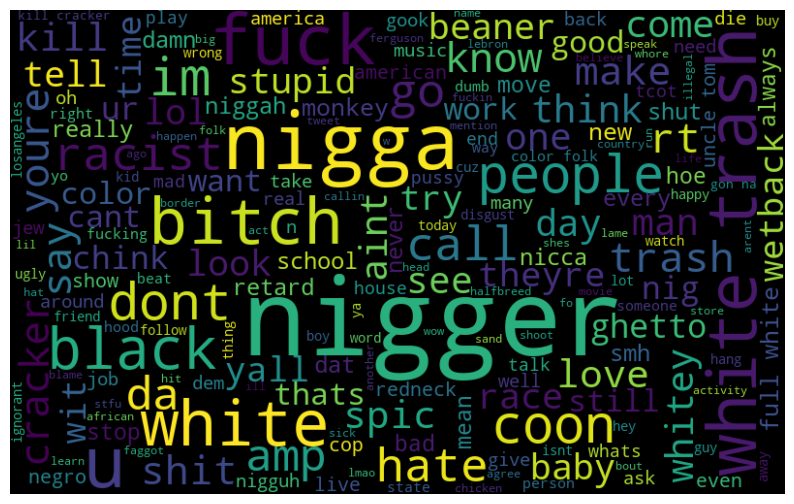

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in df[df['categories'] == 1]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

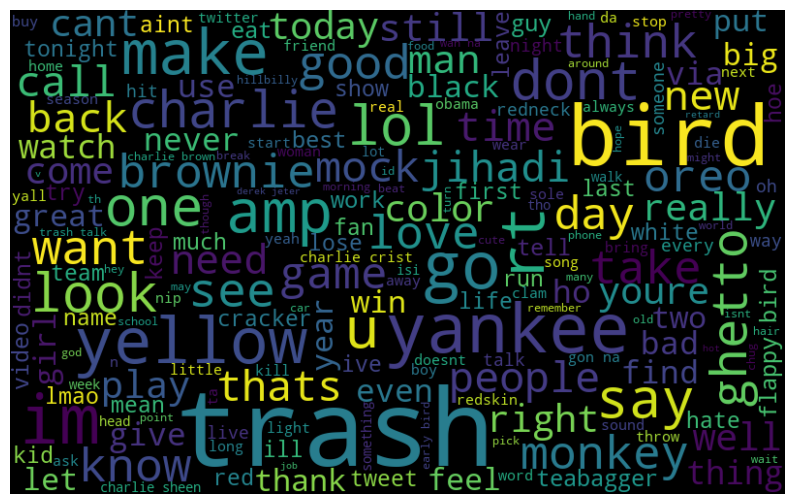

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in df[df['categories'] == 0]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

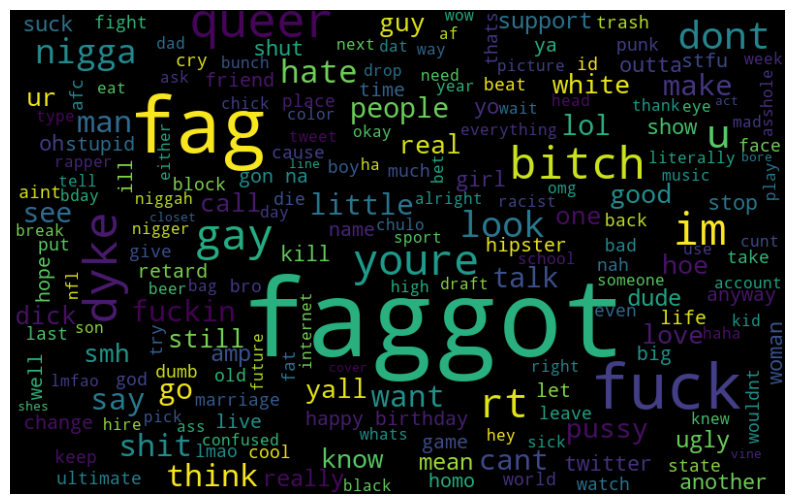

In [49]:
normal_words =' '.join([text for text in df[df['categories'] == 2]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

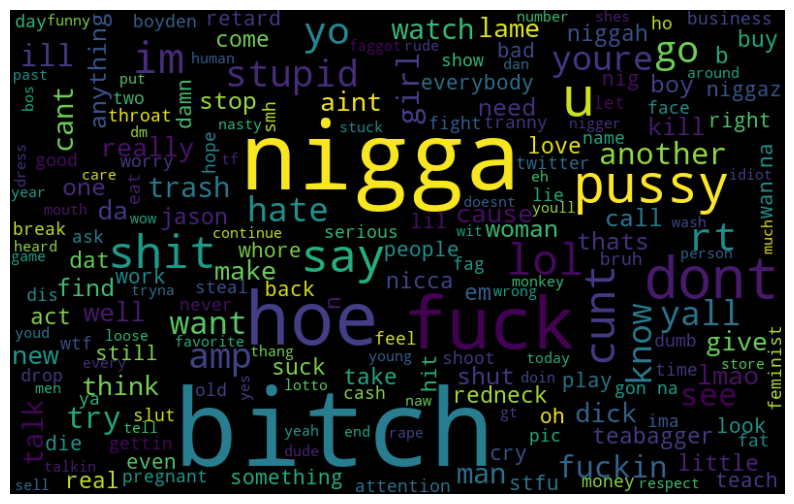

In [51]:
normal_words =' '.join([text for text in df[df['categories'] == 3]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

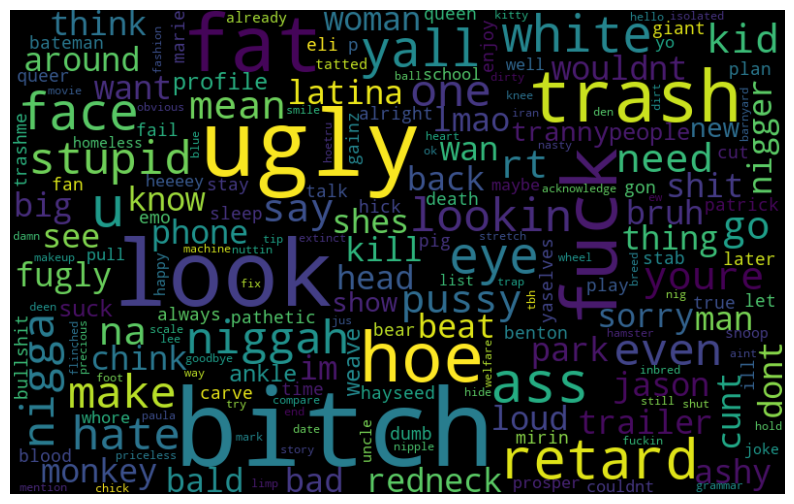

In [52]:
normal_words =' '.join([text for text in df[df['categories'] == 4]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

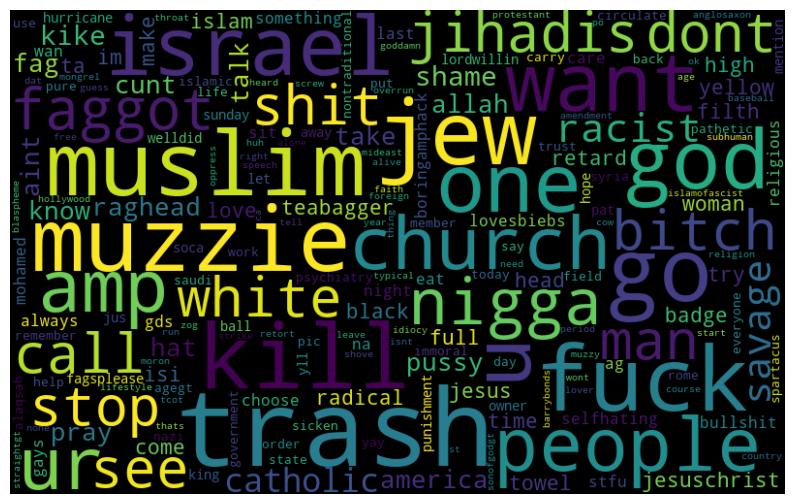

In [53]:
normal_words =' '.join([text for text in df[df['categories'] == 5]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

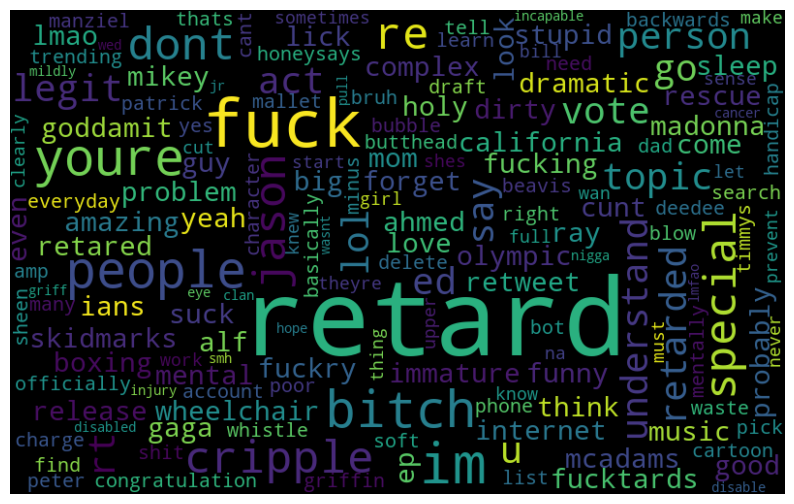

In [54]:
normal_words =' '.join([text for text in df[df['categories'] == 6]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

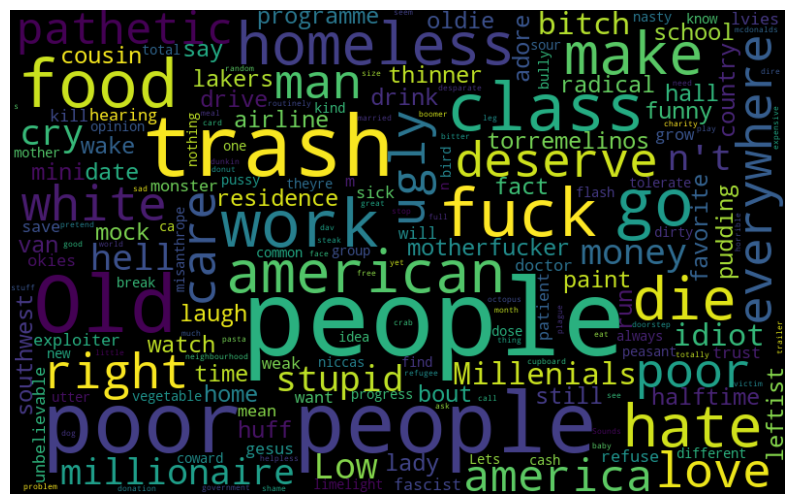

In [55]:
normal_words =' '.join([text for text in df[df['categories'] == 7]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

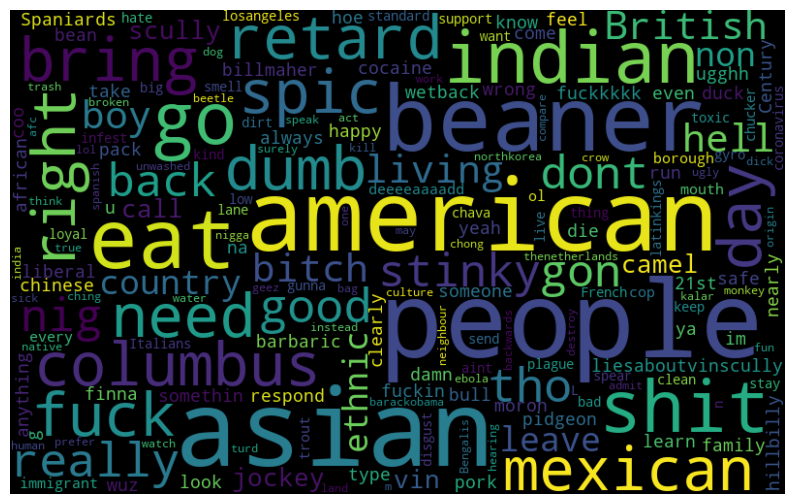

In [56]:
normal_words =' '.join([text for text in df[df['categories'] == 8]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

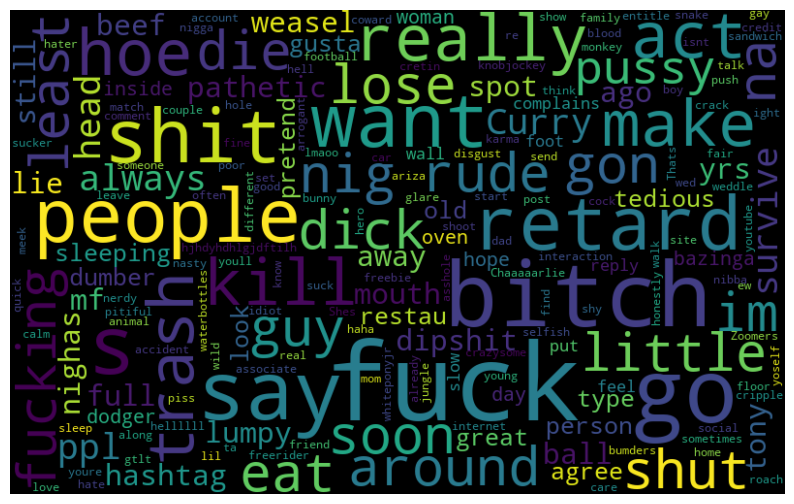

In [57]:
normal_words =' '.join([text for text in df[df['categories'] == 9]['Lemmatized_Tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
df.columns

Index(['tweet', 'label', 'categories', 'Tweet', 'Tokenized_tweet',
       'Clean_tweets', 'Lemmatized_Tweets'],
      dtype='object')

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_20408\849155819.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


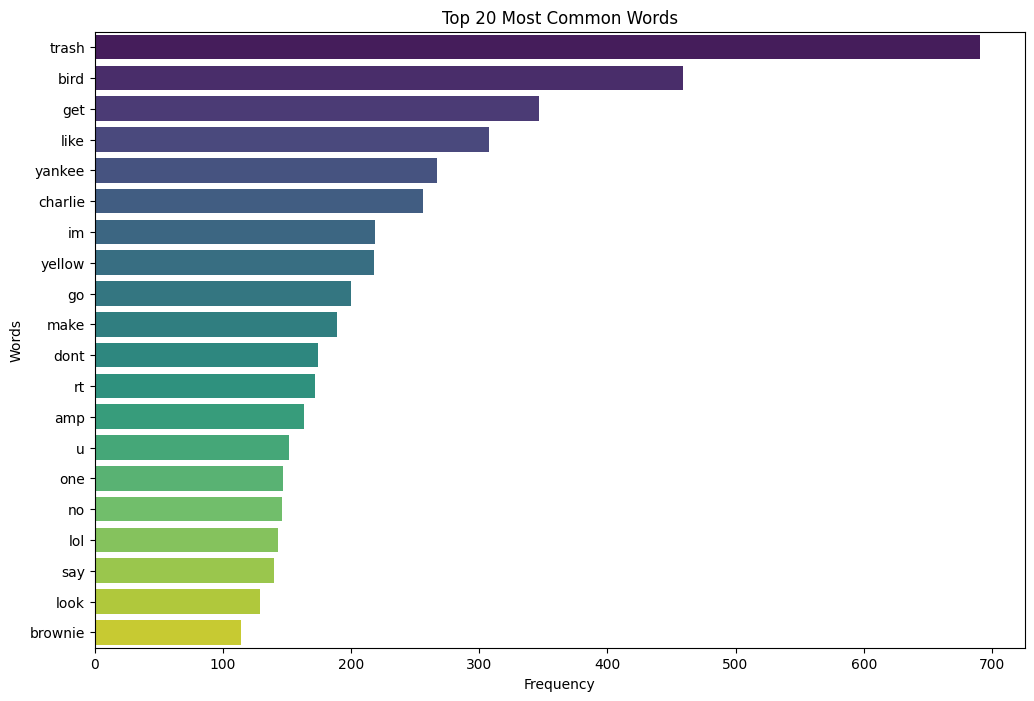

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 0]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
words, frequencies = zip(*most_common_words)

# Plotting 'Normal':0
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\86662373.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


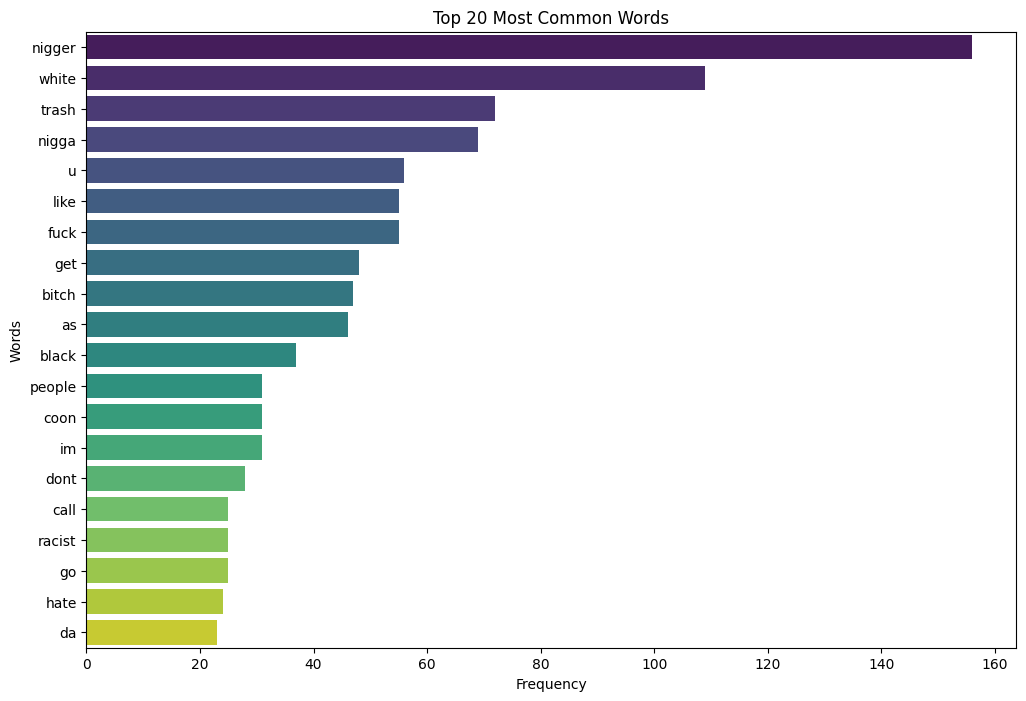

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 1]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Race':1
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\4070635529.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


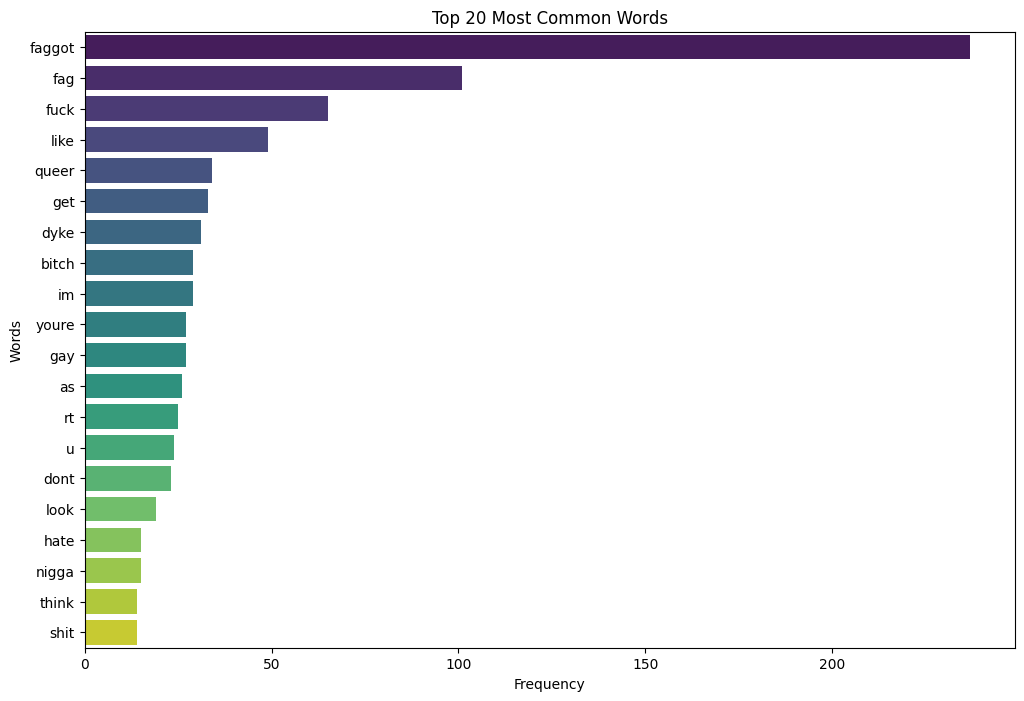

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 2]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Sexual Orientation':2
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\3407942955.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


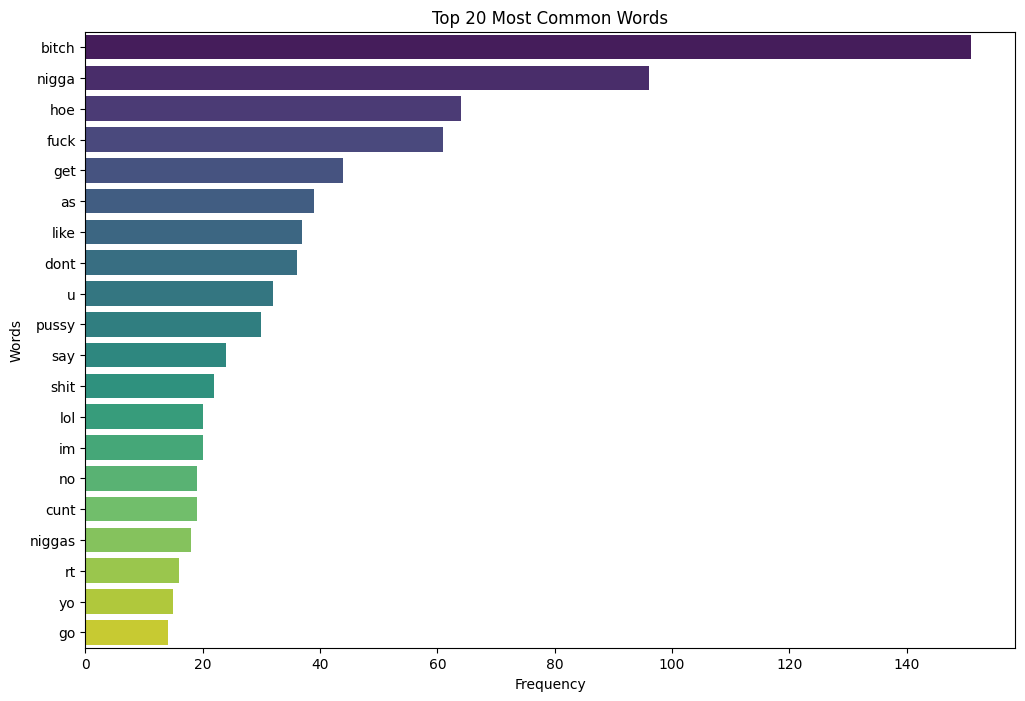

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 3]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Gender':3
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\398975076.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


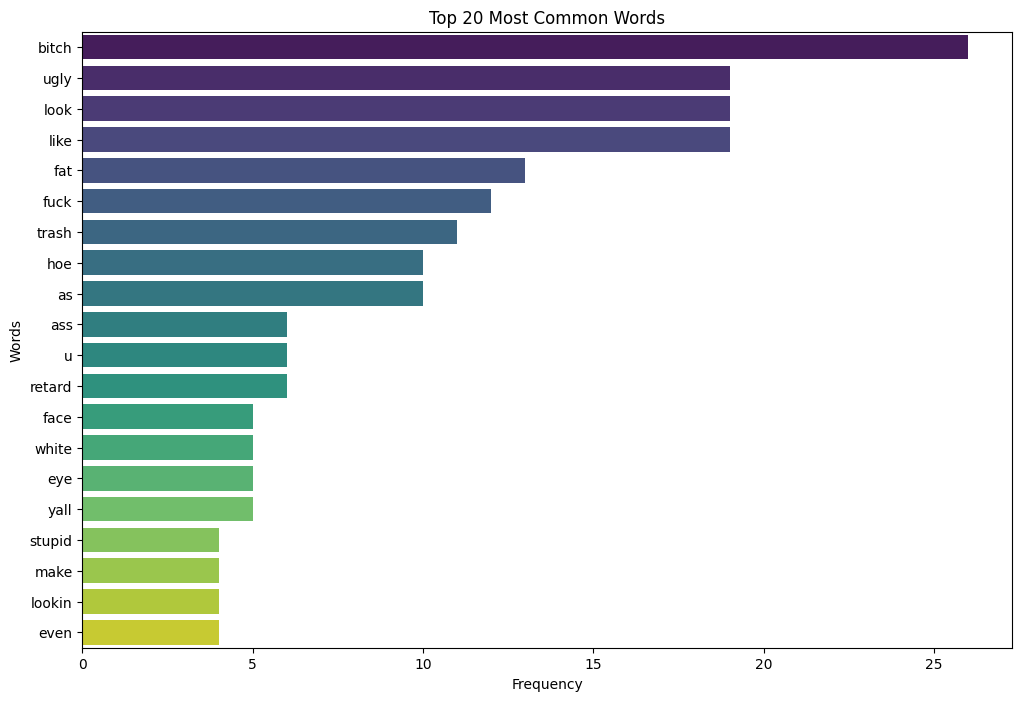

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 4]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Physical Appearance':4
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\1626611874.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


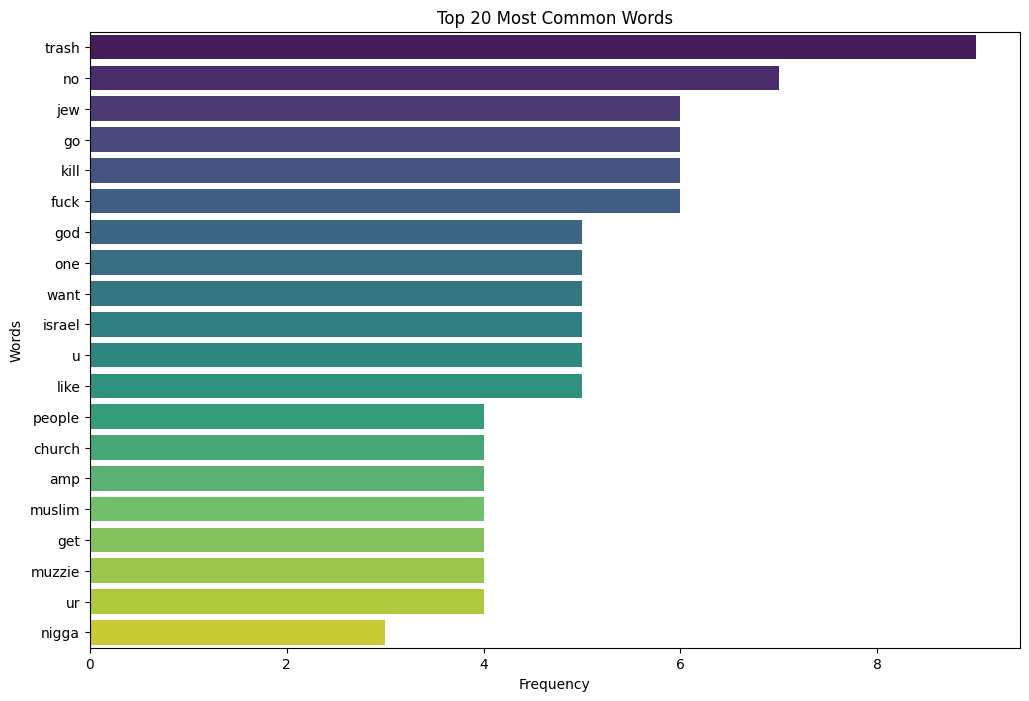

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 5]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Religion':5
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\3587545160.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


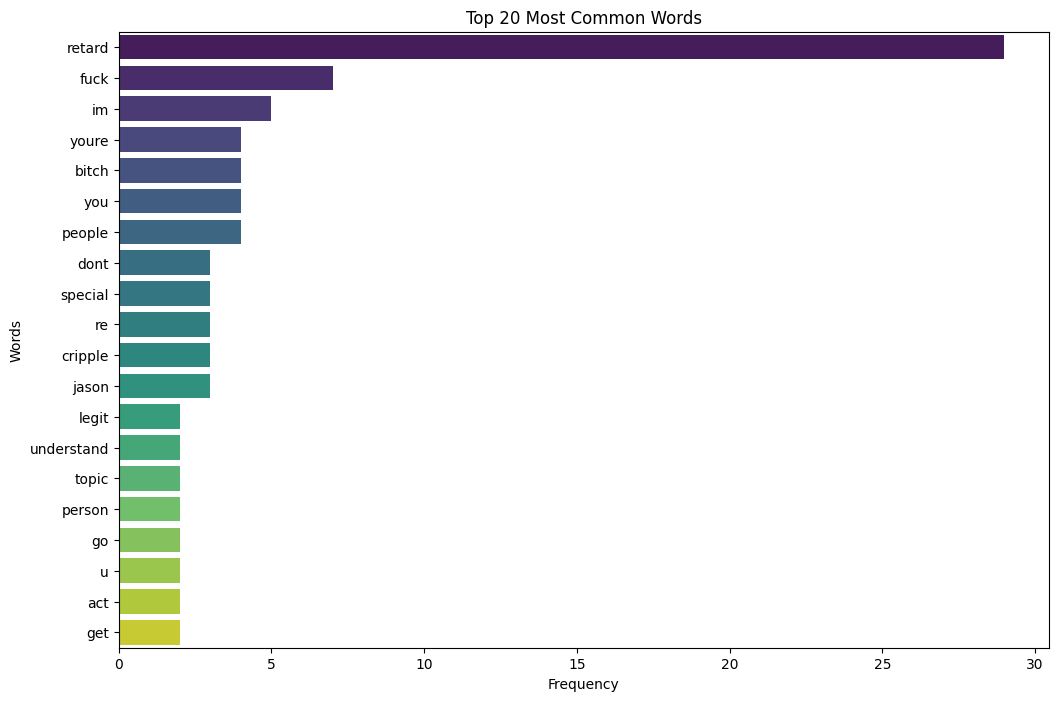

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 6]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Disability':6
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\4121608427.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


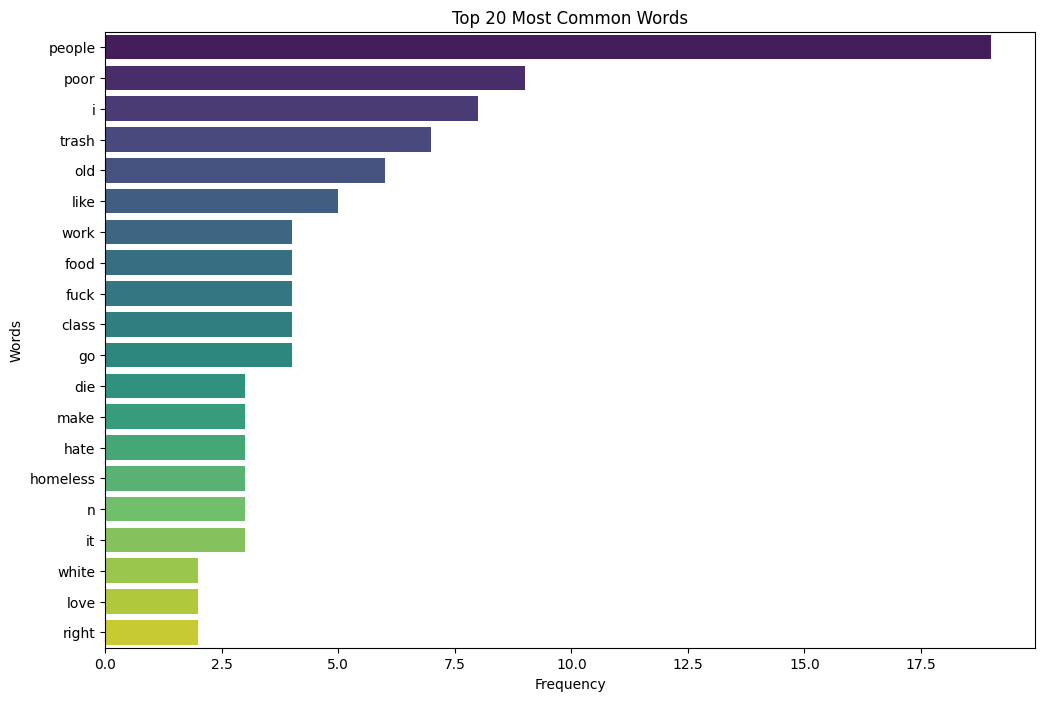

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 7]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Class':7
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\1844384147.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


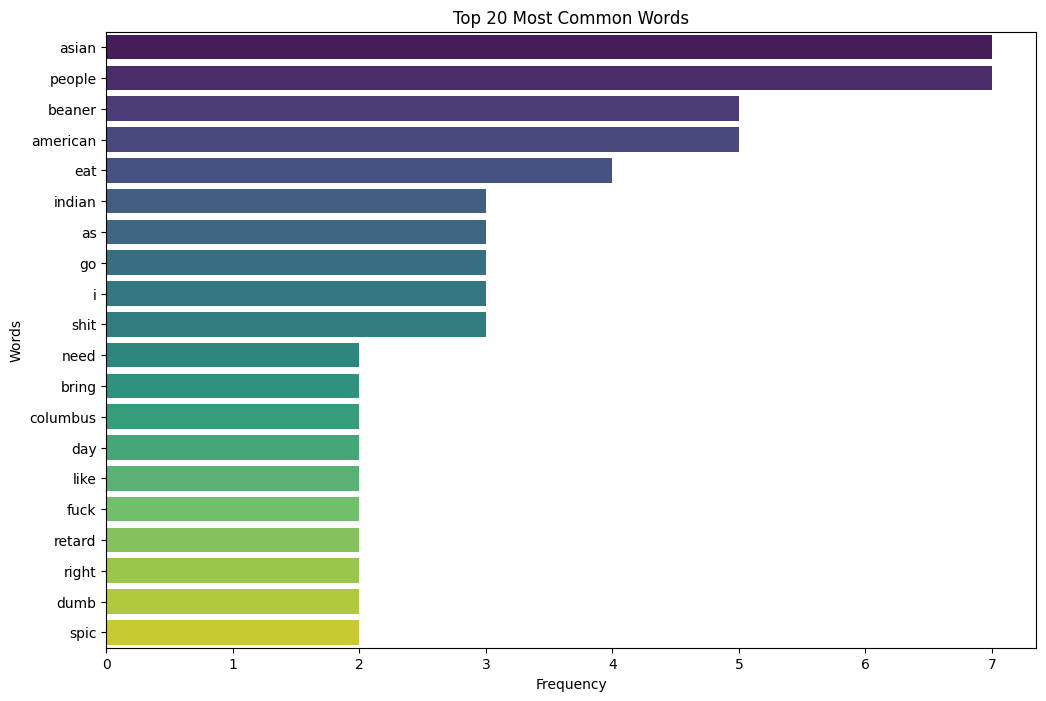

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 8]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Ethnicity':8
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_15172\3257050582.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


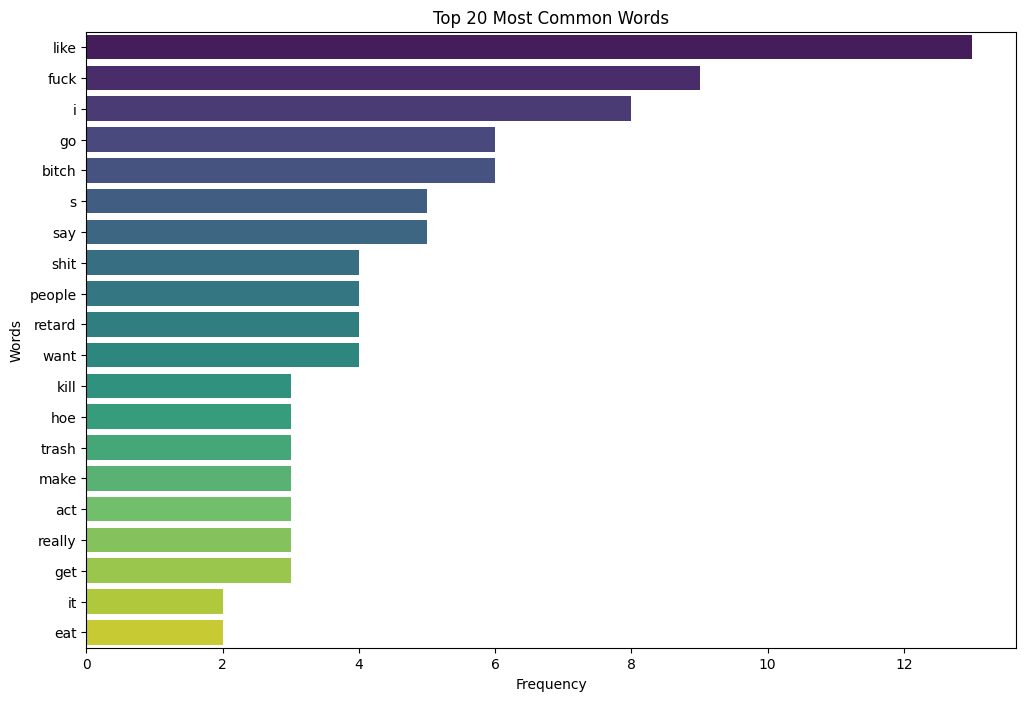

In [ ]:
from collections import Counter
import re

all_text = " ".join(df[df['categories'] == 9]['Lemmatized_Tweets'].astype(str))
words = re.findall(r'\w+', all_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, frequencies = zip(*most_common_words)

# Plotting 'Behavior':9
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette="viridis")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [68]:
import re
replacement_map = {
    r'\bfuck(ing|in|ry)?\b': 'fuck',
    r'\bn(igg|igga|iggah|ighas)\b': 'nigger',
    r'\bfag(got)?\b': 'faggot'
}

# Function to apply replacements
def replace_words(text):
    for pattern, replacement in replacement_map.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    return text

# Apply the function to the 'Lemmatized_Tweets' column
df['Lemmatized_Tweets'] = df['Lemmatized_Tweets'].apply(replace_words)


In [69]:
X = df['Lemmatized_Tweets']
y = df['categories']

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

X_counts = count_vect.fit_transform(X)
X_tfidf = transformer.fit_transform(X_counts)

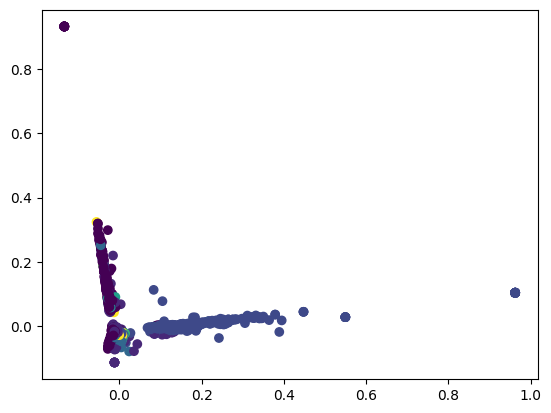

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_tfidf)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['categories'], cmap='viridis')
plt.show()


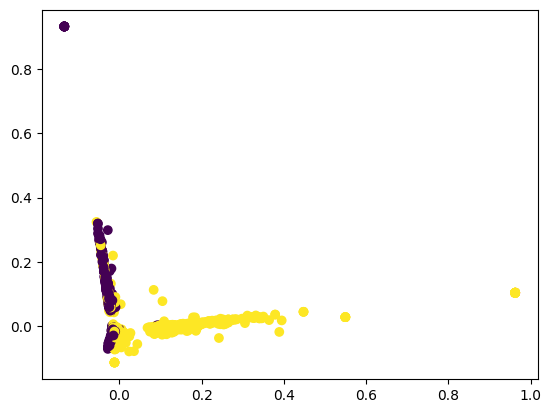

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_tfidf)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['label'], cmap='viridis')
plt.show()


In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model Training

Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model (replace with your preferred model)
model = LogisticRegression()

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       833
           1       0.78      0.65      0.71       105
           2       0.91      0.88      0.90        85
           3       0.62      0.54      0.58        56
           4       0.67      0.27      0.38        15
           5       0.00      0.00      0.00        10
           6       1.00      0.38      0.55         8
           7       1.00      0.38      0.55         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8

    accuracy                           0.88      1136
   macro avg       0.59      0.41      0.46      1136
weighted avg       0.86      0.88      0.87      1136

Fold 2


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       833
           1       0.85      0.63      0.73       104
           2       0.99      0.81      0.89        86
           3       0.62      0.68      0.65        56
           4       0.67      0.27      0.38        15
           5       0.00      0.00      0.00        10
           6       0.67      0.50      0.57         8
           7       0.75      0.38      0.50         8
           8       0.50      0.25      0.33         8
           9       0.00      0.00      0.00         8

    accuracy                           0.89      1136
   macro avg       0.59      0.45      0.50      1136
weighted avg       0.87      0.89      0.88      1136

Fold 3


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       833
           1       0.81      0.62      0.70       104
           2       0.92      0.90      0.91        86
           3       0.68      0.71      0.70        56
           4       0.67      0.14      0.24        14
           5       0.00      0.00      0.00        11
           6       0.67      0.75      0.71         8
           7       1.00      0.38      0.55         8
           8       1.00      0.38      0.55         8
           9       0.00      0.00      0.00         8

    accuracy                           0.90      1136
   macro avg       0.67      0.49      0.53      1136
weighted avg       0.88      0.90      0.88      1136

Fold 4


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       832
           1       0.82      0.61      0.70       105
           2       0.97      0.88      0.93        86
           3       0.56      0.62      0.59        56
           4       0.20      0.07      0.11        14
           5       0.00      0.00      0.00        11
           6       0.20      0.12      0.15         8
           7       1.00      0.25      0.40         8
           8       0.33      0.12      0.18         8
           9       0.00      0.00      0.00         8

    accuracy                           0.88      1136
   macro avg       0.50      0.37      0.40      1136
weighted avg       0.85      0.88      0.86      1136

Fold 5
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       832
           1       0.71      0.63      0.67       105
           2       0.95      0.86      0.90        86
           3     

C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

SVM

In [67]:
from sklearn.svm import LinearSVC, SVC
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model (replace with your preferred model)
model = LinearSVC(tol=1e-4, C=0.1, multi_class='ovr', max_iter=2000)

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       833
           1       0.74      0.67      0.70       105
           2       0.91      0.91      0.91        85
           3       0.65      0.59      0.62        56
           4       0.83      0.33      0.48        15
           5       0.00      0.00      0.00        10
           6       1.00      0.50      0.67         8
           7       1.00      0.38      0.55         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8

    accuracy                           0.89      1136
   macro avg       0.60      0.43      0.49      1136
weighted avg       0.86      0.89      0.87      1136

Fold 2


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       833
           1       0.86      0.67      0.76       104
           2       0.99      0.88      0.93        86
           3       0.63      0.68      0.66        56
           4       0.67      0.27      0.38        15
           5       0.00      0.00      0.00        10
           6       0.57      0.50      0.53         8
           7       1.00      0.38      0.55         8
           8       0.40      0.25      0.31         8
           9       0.00      0.00      0.00         8

    accuracy                           0.90      1136
   macro avg       0.60      0.46      0.51      1136
weighted avg       0.88      0.90      0.88      1136

Fold 3


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       833
           1       0.78      0.58      0.66       104
           2       0.90      0.92      0.91        86
           3       0.67      0.73      0.70        56
           4       0.67      0.14      0.24        14
           5       0.00      0.00      0.00        11
           6       0.70      0.88      0.78         8
           7       1.00      0.50      0.67         8
           8       1.00      0.38      0.55         8
           9       0.00      0.00      0.00         8

    accuracy                           0.89      1136
   macro avg       0.66      0.51      0.54      1136
weighted avg       0.87      0.89      0.88      1136

Fold 4


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       832
           1       0.80      0.65      0.72       105
           2       0.94      0.90      0.92        86
           3       0.55      0.66      0.60        56
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        11
           6       0.57      0.50      0.53         8
           7       0.67      0.25      0.36         8
           8       0.60      0.38      0.46         8
           9       0.00      0.00      0.00         8

    accuracy                           0.88      1136
   macro avg       0.50      0.43      0.45      1136
weighted avg       0.86      0.88      0.87      1136

Fold 5
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       832
           1       0.70      0.65      0.67       105
           2       0.95      0.88      0.92        86
           3     

C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Naive Bayes

In [68]:
from sklearn.naive_bayes import MultinomialNB
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model (replace with your preferred model)
model = MultinomialNB(alpha=0.1, fit_prior=True, class_prior=None)

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       833
           1       0.46      0.64      0.53       105
           2       0.57      0.69      0.62        85
           3       0.40      0.48      0.44        56
           4       0.31      0.33      0.32        15
           5       0.17      0.10      0.12        10
           6       0.13      0.25      0.17         8
           7       0.36      0.50      0.42         8
           8       0.27      0.38      0.32         8
           9       0.12      0.12      0.12         8

    accuracy                           0.78      1136
   macro avg       0.38      0.44      0.40      1136
weighted avg       0.81      0.78      0.79      1136

Fold 2
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       833
           1       0.45      0.57      0.50       104
           2       0.61      0.74      0.67        86
          

Gradient Boost

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model (replace with your preferred model)
model = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1.0, max_features=None)

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       833
           1       0.73      0.69      0.71       105
           2       0.87      0.96      0.92        85
           3       0.69      0.66      0.67        56
           4       0.46      0.40      0.43        15
           5       0.00      0.00      0.00        10
           6       0.42      0.62      0.50         8
           7       0.50      0.38      0.43         8
           8       0.00      0.00      0.00         8
           9       0.50      0.12      0.20         8

    accuracy                           0.88      1136
   macro avg       0.51      0.48      0.48      1136
weighted avg       0.87      0.88      0.87      1136

Fold 2


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       833
           1       0.66      0.62      0.64       104
           2       0.92      0.94      0.93        86
           3       0.63      0.70      0.66        56
           4       0.62      0.53      0.57        15
           5       0.00      0.00      0.00        10
           6       0.50      0.62      0.56         8
           7       0.50      0.12      0.20         8
           8       0.33      0.25      0.29         8
           9       0.00      0.00      0.00         8

    accuracy                           0.87      1136
   macro avg       0.51      0.47      0.48      1136
weighted avg       0.86      0.87      0.86      1136

Fold 3
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       833
           1       0.73      0.57      0.64       104
           2       0.89      0.93      0.91        86
           3     

In [74]:
from sklearn.ensemble import RandomForestClassifier
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model (replace with your preferred model)
model = RandomForestClassifier()

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       833
           1       0.78      0.66      0.71       105
           2       0.89      0.93      0.91        85
           3       0.67      0.50      0.57        56
           4       1.00      0.20      0.33        15
           5       0.00      0.00      0.00        10
           6       1.00      0.38      0.55         8
           7       1.00      0.38      0.55         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8

    accuracy                           0.89      1136
   macro avg       0.62      0.40      0.46      1136
weighted avg       0.87      0.89      0.87      1136

Fold 2


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       833
           1       0.76      0.59      0.66       104
           2       0.96      0.90      0.93        86
           3       0.67      0.62      0.65        56
           4       0.67      0.13      0.22        15
           5       1.00      0.10      0.18        10
           6       0.40      0.25      0.31         8
           7       1.00      0.25      0.40         8
           8       0.50      0.12      0.20         8
           9       0.00      0.00      0.00         8

    accuracy                           0.88      1136
   macro avg       0.69      0.40      0.45      1136
weighted avg       0.87      0.88      0.87      1136

Fold 3


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       833
           1       0.75      0.54      0.63       104
           2       0.89      0.91      0.90        86
           3       0.62      0.55      0.58        56
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        11
           6       0.60      0.38      0.46         8
           7       1.00      0.38      0.55         8
           8       1.00      0.38      0.55         8
           9       0.00      0.00      0.00         8

    accuracy                           0.88      1136
   macro avg       0.58      0.41      0.46      1136
weighted avg       0.85      0.88      0.86      1136

Fold 4


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       832
           1       0.72      0.58      0.64       105
           2       0.92      0.90      0.91        86
           3       0.59      0.61      0.60        56
           4       1.00      0.07      0.13        14
           5       0.00      0.00      0.00        11
           6       0.67      0.50      0.57         8
           7       0.00      0.00      0.00         8
           8       1.00      0.38      0.55         8
           9       0.00      0.00      0.00         8

    accuracy                           0.88      1136
   macro avg       0.58      0.40      0.43      1136
weighted avg       0.85      0.88      0.86      1136

Fold 5
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       832
           1       0.64      0.67      0.65       105
           2       0.94      0.88      0.91        86
           3     

C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

# Initialize StratifiedKFold and RandomOverSampler
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oversampler = RandomOverSampler(random_state=42)

model = DecisionTreeClassifier(criterion='entropy', min_samples_split=7, min_samples_leaf=4, max_depth=20, random_state=42)

# Lists to store the performance metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data into training and test sets
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the Decision Tree model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model and print classification report
    print(classification_report(y_test, y_pred))
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append metrics for each fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Print overall performance across all folds
print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       833
           1       0.70      0.51      0.59       105
           2       0.88      0.89      0.89        85
           3       0.77      0.48      0.59        56
           4       0.16      0.27      0.20        15
           5       0.00      0.00      0.00        10
           6       0.42      0.62      0.50         8
           7       0.16      0.38      0.22         8
           8       0.00      0.00      0.00         8
           9       0.14      0.12      0.13         8

    accuracy                           0.85      1136
   macro avg       0.41      0.42      0.41      1136
weighted avg       0.84      0.85      0.84      1136

Fold 2
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       833
           1       0.76      0.43      0.55       104
           2       0.95      0.84      0.89        86
           3     

C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [ ]:
%pip install catboost

In [76]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Initialize StratifiedKFold and RandomOverSampler
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oversampler = RandomOverSampler(random_state=42)

# Initialize the CatBoost model
model = CatBoostClassifier(max_depth=10, learning_rate=0.1, iterations=100, random_state=42, verbose=0)

# Lists to store performance metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    # Performance metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Print overall performance across all folds
print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")


Fold 1
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       833
           1       0.71      0.68      0.69       105
           2       0.89      0.94      0.91        85
           3       0.64      0.64      0.64        56
           4       0.40      0.40      0.40        15
           5       0.05      0.10      0.06        10
           6       0.33      0.62      0.43         8
           7       0.12      0.38      0.19         8
           8       0.00      0.00      0.00         8
           9       0.02      0.12      0.04         8

    accuracy                           0.82      1136
   macro avg       0.41      0.48      0.43      1136
weighted avg       0.87      0.82      0.84      1136

Fold 2
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       833
           1       0.73      0.59      0.65       104
           2       0.96      0.86      0.91        86
          

In [ ]:
df.to_csv('processed_tweets.csv', index=False, encoding='utf-8')

Deep Learning

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [27]:
import tensorflow as tf
from keras.preprocessing import sequence

In [51]:
%pip uninstall keras

^C
Note: you may need to restart the kernel to use updated packages.


In [28]:
from collections import Counter

# Tokenize the text and fit on the data
token = tf.keras.preprocessing.text.Tokenizer()
token.fit_on_texts(df.Lemmatized_Tweets)

# Get the number of unique words
max_features = len(token.word_index)

print(f'Max features (vocab size): {max_features}')

Max features (vocab size): 10208


In [29]:
sequences = token.texts_to_sequences(df.Lemmatized_Tweets)

sequence_lengths = [len(seq) for seq in sequences]

max_length = max(sequence_lengths)

print(f'Max sequence length: {max_length}')
print(f'Median sequence length: {np.median(sequence_lengths)}')

Max sequence length: 32
Median sequence length: 8.0


In [30]:
token=tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
token.fit_on_texts(df.Lemmatized_Tweets)

In [31]:
X_train_seq=token.texts_to_sequences(X_train)
X_test_seq=token.texts_to_sequences(X_test)

In [32]:
X_train_pad = sequence.pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = sequence.pad_sequences(X_test_seq, maxlen=max_length)

In [33]:
from keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
'''import urllib.request, zipfile

url = 'http://nlp.stanford.edu/data/glove.6B.zip'
urllib.request.urlretrieve(url, 'glove.6B.zip')

output_path = 'glove.6B.zip'

# Download the file from the URL
print("Downloading GloVe embeddings...")
urllib.request.urlretrieve(url, output_path)

with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall('glove_files')'''

In [35]:
%pip install --upgrade scipy
%pip install --upgrade gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
    --------------------------------------- 0.4/24.0 MB 11.2 MB/s eta 0:00:03
   - -------------------------------------- 0.8/24.0 MB 10.5 MB/s eta 0:00:03
   -- ------------------------------------- 1.3/24.0 MB 11.5 MB/s eta 0:00:02
   --- ------------------------------------ 2.0/24.0 MB 11.7 MB/s eta 0:00:02
   ---- ----------------------------------- 2.7/24.0 MB 12.2 MB/s eta 0:00:02
   ----- ---------------------------------- 3.3/24.0 MB 13.0 MB/s eta 0:00:02
   ------ --------------------------------- 3.9/24.0 MB 12.5 MB/s eta 0:00:02
  

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.27.1 requires packaging<24,>=16.8, but you have packaging 24.2 which is incompatible.
streamlit 1.27.1 requires pillow<11,>=7.1.0, but you have pillow 11.0.0 which is incompatible.
st-gsheets-connection 0.0.3 requires pandas<2,>=1.3.0, but you have pandas 2.2.3 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Pr

In [34]:
from gensim.scripts.glove2word2vec import glove2word2vec


glove_input_file = 'glove_files/glove.6B.300d.txt'  # Use the 300d version, or change to 50d, 100d, or 200d as needed
word2vec_output_file = 'glove.6B.300d.word2vec.txt'


glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_14844\4091562953.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 300)

In [36]:
from gensim.models import KeyedVectors

word2vec_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Test the model with a query
print(word2vec_model.most_similar('king'))

[('queen', 0.6336469054222107), ('prince', 0.6196622848510742), ('monarch', 0.5899620652198792), ('kingdom', 0.5791266560554504), ('throne', 0.5606487989425659), ('ii', 0.5562329292297363), ('iii', 0.5503199100494385), ('crown', 0.5224862694740295), ('reign', 0.5217353701591492), ('kings', 0.5066401958465576)]


In [37]:
embedding_dim = 300
embedding_matrix = np.zeros((max_features + 1, embedding_dim))
print(embedding_matrix.shape)

for word, i in sorted(token.word_index.items(),key=lambda x:x[1]):
    if i > (max_features+1):
        break
    try:
        embedding_vector = word2vec_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

(10209, 300)


In [38]:
import tensorflow as tf
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [39]:
from keras.models import Sequential, Model
from keras.layers import LSTM, GRU,SimpleRNN
from keras.layers import Dense, Activation, Dropout, Conv1D, BatchNormalization, ReLU
from keras.layers import SpatialDropout1D, GlobalMaxPooling1D, Concatenate, Bidirectional
from keras.callbacks import EarlyStopping
from keras.layers import Embedding

In [42]:
model = Sequential()
model.add(tf.keras.layers.Embedding(max_features+1, embedding_dim, input_length=X_train_pad.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
print(model.summary())

C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
history = model.fit(X_train_pad, y_train, epochs=100, batch_size=512,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.5238 - loss: 1.9344 - val_accuracy: 0.7324 - val_loss: 1.1602
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.7302 - loss: 1.1226 - val_accuracy: 0.7324 - val_loss: 1.0510
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.7409 - loss: 0.9859 - val_accuracy: 0.7324 - val_loss: 1.0129
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.7407 - loss: 0.9373 - val_accuracy: 0.7324 - val_loss: 0.9658
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.7467 - loss: 0.8809 - val_accuracy: 0.7559 - val_loss: 0.9013
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.7756 - loss: 0.7777 - val_accuracy: 0.7746 - val_loss: 0.8228
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - accuracy: 0.7768 - loss: 0.6996 - val_accuracy: 0.7840 - val_loss: 0.7321
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step - accuracy: 0.8175 - loss: 0.5763 - val_accuracy: 0.8052 - v

In [44]:
accr = model.evaluate(X_test_pad,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8715 - loss: 0.5714
Test set
  Loss: 0.628
  Accuracy: 0.858


In [59]:
model1 = Sequential()
model1.add(tf.keras.layers.Embedding(max_features + 1,
                     embedding_dim,
                     weights=[embedding_matrix],
                     input_length=max_length,
                     trainable=False))
model1.add(SpatialDropout1D(0.3))
model1.add(LSTM(300, dropout=0.3, recurrent_dropout=0.3))

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history1 = model1.fit(X_train_pad, y_train, epochs=100, batch_size=512,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 951ms/step - accuracy: 0.5540 - loss: 1.6620 - val_accuracy: 0.7324 - val_loss: 1.1201
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 796ms/step - accuracy: 0.7414 - loss: 0.9372 - val_accuracy: 0.7746 - val_loss: 0.8370
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 775ms/step - accuracy: 0.7675 - loss: 0.8078 - val_accuracy: 0.7911 - val_loss: 0.7136
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 794ms/step - accuracy: 0.8015 - loss: 0.6871 - val_accuracy: 0.8146 - val_loss: 0.7014
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 853ms/step - accuracy: 0.8187 - loss: 0.6505 - val_accuracy: 0.8357 - val_loss: 0.7180
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 810ms/step - accuracy: 0.8382 - loss: 0.6083 - val_accuracy: 0.8451 - val_loss: 0.6241
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 803ms/step - accuracy: 0.8510 - loss: 0.5365 - val_accuracy: 0.8451 - val_loss: 0.5789
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 794ms/step - accuracy: 0.8653 - loss: 0.5030 - val_accuracy: 0.8592 - 

In [62]:
accr1 = model1.evaluate(X_test_pad,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8857 - loss: 0.4770
Test set
  Loss: 0.518
  Accuracy: 0.864


In [65]:
model3 = Sequential()
model3.add(Embedding(max_features + 1,
                     embedding_dim,
                     weights=[embedding_matrix],
                     input_length=max_length,
                     trainable=False))
model3.add(SpatialDropout1D(0.3))
model3.add(Bidirectional(LSTM(300, dropout=0.3, recurrent_dropout=0.3)))

model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))

'''model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))'''

model3.add(Dense(10))
model3.add(Activation('softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history3 = model3.fit(X_train_pad, y=y_train, batch_size=512, epochs=100, 
          verbose=1, validation_split=0.1, callbacks=[earlystop])

Epoch 1/100


C:\Users\Mrudula\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5312 - loss: 1.7776 - val_accuracy: 0.7324 - val_loss: 1.0811
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7420 - loss: 0.9708 - val_accuracy: 0.7512 - val_loss: 0.8563
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7597 - loss: 0.8085 - val_accuracy: 0.7887 - val_loss: 0.7590
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8059 - loss: 0.7028 - val_accuracy: 0.8052 - val_loss: 0.6882
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8095 - loss: 0.6645 - val_accuracy: 0.8357 - val_loss: 0.6458
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8277 - loss: 0.6181 - val_accuracy: 0.8451 - val_loss: 0.6000
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8481 - loss: 0.5503 - val_accuracy: 0.8427 - val_loss: 0.5969
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8531 - loss: 0.5335 - val_accuracy: 0.8521 - val_loss: 0.6081
Epoch 9/100


In [66]:
accr3 = model3.evaluate(X_test_pad,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8858 - loss: 0.4468
Test set
  Loss: 0.492
  Accuracy: 0.875


In [67]:
model = Sequential()
model.add(Embedding(max_features + 1,
                     embedding_dim,
                     weights=[embedding_matrix],
                     input_length=max_length,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(X_train_pad, y=y_train, batch_size=512, epochs=100, 
          verbose=1, validation_split=0.1, callbacks=[earlystop])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5882 - loss: 1.5542 - val_accuracy: 0.7324 - val_loss: 1.5474
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7437 - loss: 0.9653 - val_accuracy: 0.7230 - val_loss: 1.1609
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7796 - loss: 0.7960 - val_accuracy: 0.7746 - val_loss: 1.0508
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8025 - loss: 0.7198 - val_accuracy: 0.7770 - val_loss: 1.0668
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8140 - loss: 0.6588 - val_accuracy: 0.7981 - val_loss: 0.9386
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8256 - loss: 0.6314 - val_accuracy: 0.8075 - val_loss: 0.9560
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8446 - loss: 0.5718 - val_accuracy: 0.8075 - val_loss: 0.9335
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8514 - loss: 0.5753 - val_accuracy: 0.8169 - val_loss: 0.8871


In [68]:
accr4 = model.evaluate(X_test_pad,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr4[0],accr4[1]))

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8573 - loss: 0.6241
Test set
  Loss: 0.632
  Accuracy: 0.849
